In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import max_error
import seaborn as sns
from keras.callbacks import History 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import TimeSeriesSplit 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import Bidirectional
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jorge/anaconda3/envs/machinelearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
path = os.getcwd()
folder = path+"/dataset/ts_jorge_MW8.6/"
print(folder)

/home/jorge/tsunami-warning/dataset/ts_jorge_MW8.6/


In [3]:
df = pd.read_json(folder+'DataFrame_boyas79_80viña.json') # cargar dataframe

Text(0, 0.5, 'Altura de ola [m]')

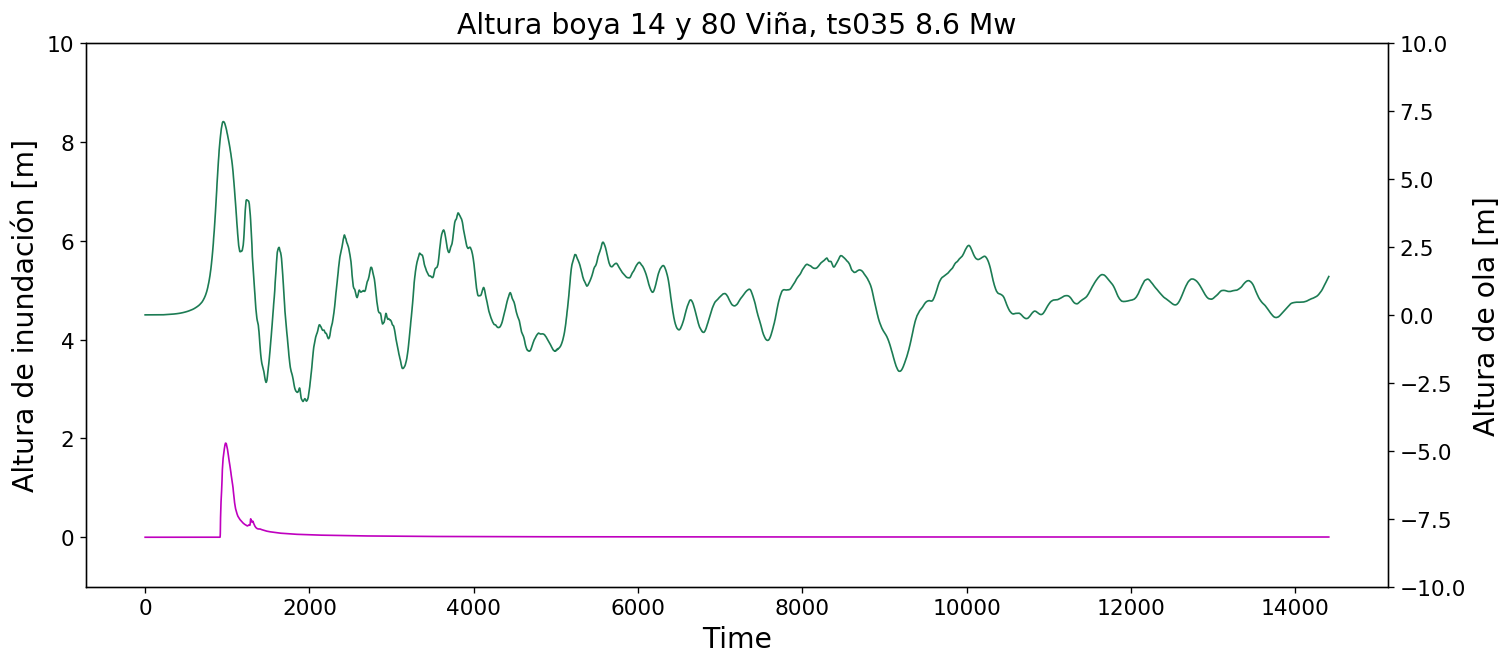

In [4]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boya 14 y 80 Viña, ts035 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts035'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas79_ts035'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)

In [5]:
df = df.loc[0:1799]

In [6]:
df.describe()

,boyas79_ts002,inu_vina80_ts002,boyas79_ts034,inu_vina80_ts034,boyas79_ts035,inu_vina80_ts035,boyas79_ts043,inu_vina80_ts043,boyas79_ts050,inu_vina80_ts050,...,boyas79_s_026,inu_vina80_s_026,boyas79_s_027,inu_vina80_s_027,boyas79_s_031,inu_vina80_s_031,boyas79_s_032,inu_vina80_s_032,boyas79_s_033,inu_vina80_s_033
count,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.000000,1800.000000,1800.0,1800.000000,1800.0,...,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0,1800.000000,1800.0
mean,-0.439738,0.0,-0.140431,0.0,1.277882,0.207875,-1.032331,0.0,-0.188085,0.0,...,-0.115044,0.0,0.403564,0.0,-0.045907,0.0,0.055583,0.0,-0.376196,0.0
std,0.608827,0.0,1.481587,0.0,2.372399,0.423211,1.198723,0.0,0.516642,0.0,...,1.042747,0.0,0.627001,0.0,0.745294,0.0,1.347322,0.0,0.975594,0.0
min,-1.759183,0.0,-4.129583,0.0,-2.483465,0.000000,-3.720523,0.0,-1.555848,0.0,...,-2.571706,0.0,-0.673922,0.0,-1.679436,0.0,-2.147708,0.0,-1.957115,0.0
25%,-0.900343,0.0,-1.007310,0.0,-0.000076,0.000000,-1.919356,0.0,-0.478486,0.0,...,-0.772636,0.0,0.067613,0.0,-0.584033,0.0,-0.636872,0.0,-1.305304,0.0
50%,-0.221310,0.0,0.204962,0.0,0.217124,0.000000,-0.543173,0.0,0.024597,0.0,...,0.335304,0.0,0.256457,0.0,0.071270,0.0,-0.271082,0.0,0.005061,0.0
75%,-0.055451,0.0,0.867801,0.0,2.430115,0.173391,-0.167823,0.0,0.108189,0.0,...,0.461363,0.0,0.468113,0.0,0.506730,0.0,0.971604,0.0,0.430625,0.0
max,0.613058,0.0,2.168482,0.0,7.112984,1.905331,1.231893,0.0,1.062584,0.0,...,1.396651,0.0,2.304038,0.0,1.171595,0.0,2.860675,0.0,1.148816,0.0


Text(0, 0.5, 'Altura de ola [m]')

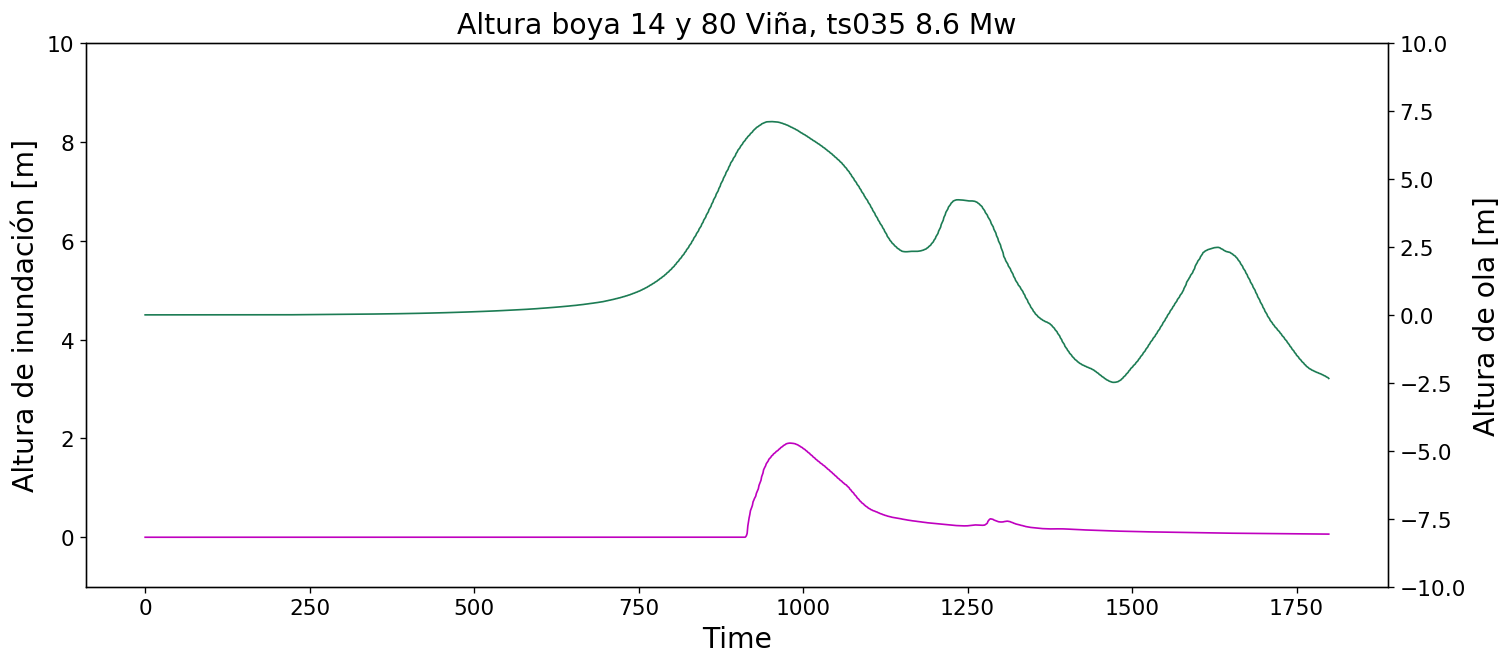

In [7]:
plt.figure(figsize=(14,6), dpi=120)

plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boya 14 y 80 Viña, ts035 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts035'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas79_ts035'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)


Text(0, 0.5, 'Altura de ola [m]')

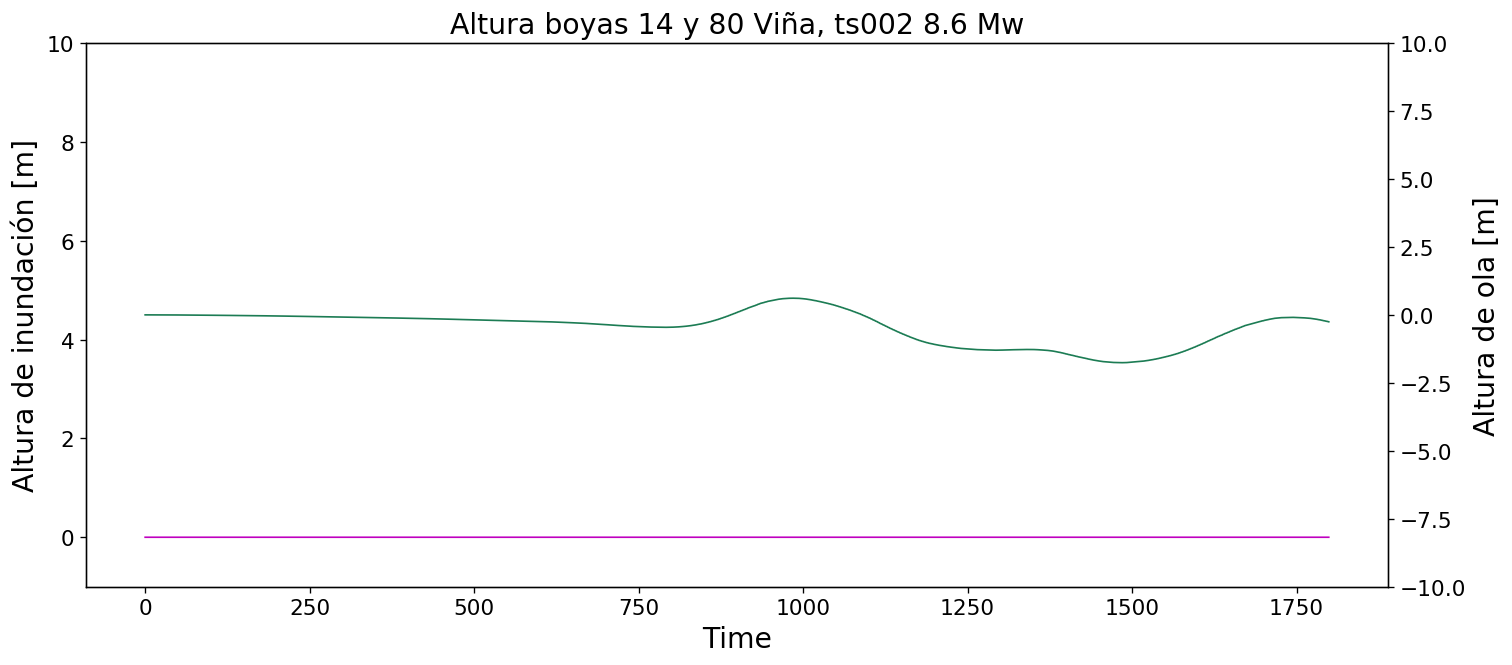

In [8]:
plt.figure(figsize=(14,6), dpi=120)
plt.ion()
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.title('Altura boyas 14 y 80 Viña, ts002 8.6 Mw',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Altura de inundación [m]',fontsize=17)
plt.plot(df['inu_vina80_ts002'], color='m', linewidth=1.0)
plt.ylim(-1,10)
plt.twinx()
plt.plot(df['boyas79_ts002'], color='#1C7C54', linewidth=1.0)
plt.ylim(-10,10)
ax = plt.gca()
#ax.invert_yaxis()
plt.ylabel('Altura de ola [m]',fontsize=17)

In [9]:
#data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.5)
#data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)

scaler = StandardScaler().fit(df)
df= pd.DataFrame(scaler.transform(df),
                                 columns=df.columns)


In [10]:
xtest = df.pop('boyas79_ts035') # asigna y quita columna
ytest = df.pop('inu_vina80_ts035') # asigna y quita columna

In [11]:
df = df.values.astype('float32')
xtest = xtest.values.astype('float32')
ytest = ytest.values.astype('float32')

In [12]:
# genera secuencias de entrada y salida

def split_sequence(df):
    X, y = list(), list()
    for time in range(0,df.shape[1],2):
        # se suma uno porque no considera el ultimo
        seq_x, seq_y = df[:,time], df[:,time+1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


In [13]:
trainX,trainY = split_sequence(df)
testX,testY = xtest,ytest

In [14]:
n_features = 1
n_steps = trainX.shape[1]
print('n_steps :',n_steps)

n_steps : 1800


In [15]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))

In [16]:
trainX.shape

(96, 1800, 1)

In [17]:
trainY.shape

(96, 1800)

In [ ]:
import time
epoch = 10
Xm = trainX
ym = trainY
tscv = TimeSeriesSplit(n_splits=2)
start = time.time()
# define model
hist = History()
model = Sequential()
model.add(LSTM(500, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(1000, activation='relu'))
model.add(Dense(n_steps))
#model.compile(optimizer=Adam(lr=0.006), loss='mse')
model.compile(optimizer='adam', loss='mse')
# fit model
for train, test in tscv.split(Xm):
    history = model.fit(Xm[train], ym[train],validation_data=(Xm[test], ym[test]), epochs=epoch, verbose=1
                        ,callbacks=[hist])
                        
#history=model.fit(trainX, trainY, epochs=epoch, verbose=1,callbacks=[hist])

end = time.time()

print('time execution',(end - start)/60)


Train on 32 samples, validate on 32 samples
Epoch 1/10
32/32 [==============================] - 47s 1s/step - loss: 0.1563 - val_loss: 0.1244
Epoch 2/10
32/32 [==============================] - 46s 1s/step - loss: 0.1555 - val_loss: 0.1236
Epoch 3/10
32/32 [==============================] - 48s 1s/step - loss: 0.1544 - val_loss: 0.1224
Epoch 4/10
32/32 [==============================] - 68s 2s/step - loss: 0.1525 - val_loss: 0.1226
Epoch 5/10
32/32 [==============================] - 60s 2s/step - loss: 0.1496 - val_loss: 0.1263
Epoch 6/10
32/32 [==============================] - 52s 2s/step - loss: 0.1486 - val_loss: 0.1194
Epoch 7/10
32/32 [==============================] - 53s 2s/step - loss: 0.1462 - val_loss: 0.1190
Epoch 8/10
32/32 [==============================] - 54s 2s/step - loss: 0.1461 - val_loss: 0.1191
Epoch 9/10
32/32 [==============================] - 56s 2s/step - loss: 0.1450 - val_loss: 0.1203
Epoch 10/10
32/32 [==============================] - 60s 2s/step - loss: 

In [ ]:
import matplotlib.pyplot as plt
a=np.linspace(1,epoch,epoch)
plt.figure(figsize=(24,4), dpi=100)
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.subplot(1,2,1)
plt.plot(a,hist.history['val_loss'],'r.',label = 'Validation')
plt.plot(a,hist.history['loss'],'g.',label = 'Train')
plt.xlabel('Epohcs',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.legend(loc='upper right')

In [ ]:
trainX = df[:,100]
trainY = df[:,101]
trainX=trainX.reshape((1,n_steps,1))
testX=testX.reshape((1,n_steps,1))

In [ ]:
trainPredict = (model.predict(trainX)).reshape(-1,1)
testPredict = (model.predict(testX)).reshape(-1,1)

In [ ]:
# invert predictions
"""
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1,1))
trainY = scaler.inverse_transform(trainY.reshape(-1,1))
testPredict = scaler.inverse_transform(testPredict.reshape(-1,1))
testY = scaler.inverse_transform(testY.reshape(-1,1))
"""

In [ ]:
plt.figure(figsize=(18,18), dpi=100)

plt.subplot(2,1,1)
plt.plot(trainY,label = 'real train')
plt.plot(trainPredict, label = 'simulado train')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.title('Altura de inundación boya 6 Valparaiso, E3 9.0 Mw',fontsize=17)
plt.ylabel('Altura [m]',fontsize=17)
plt.xlabel('Tiempo [s]',fontsize=17)
plt.legend(loc='upper right',fontsize=17)

plt.subplot(2,1,2)
plt.plot(testY,label = 'real test')
plt.plot(testPredict, label = 'simulado test')
plt.rc('xtick', labelsize=17) 
plt.rc('ytick', labelsize=17)
plt.title('Altura de inundación boya 6 Valparaiso, E3 8.5 Mw',fontsize=17)
plt.ylabel('Altura [m]',fontsize=17)
plt.xlabel('Tiempo [s]',fontsize=17)
plt.legend(loc='upper right',fontsize=17)